<a href="https://colab.research.google.com/github/Akash-awan83/iris-ml-project/blob/main/Machine_Learning_With_Iris_dataset_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [34]:
iris=pd.read_csv('Iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [35]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [36]:
# We will terminate word Iris from species column
iris['Species']=iris['Species'].str.replace('Iris-',"")
iris['Species'].head()

,Species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


## **Removing Un-needed column**

In [37]:
iris.drop('Id',axis=1,inplace=True)


In [41]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# ***Some EDA on Iris ***

In [44]:
iris['Species'].value_counts()

,count
Species,
setosa,50
versicolor,50
virginica,50


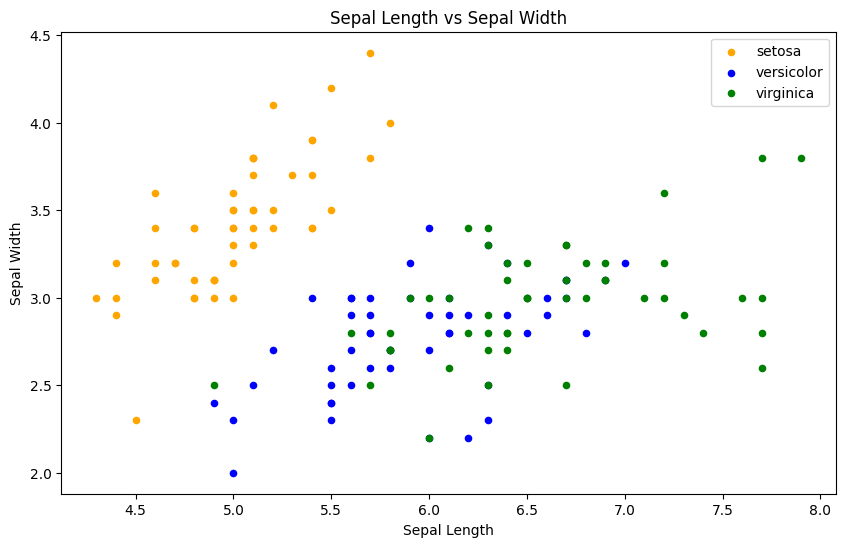

In [47]:
fig=iris[iris['Species']=='setosa'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='orange',label='setosa')
iris[iris['Species']=='versicolor'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='blue',label='versicolor',ax=fig)
iris[iris['Species']=='virginica'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='green',label='virginica',ax=fig)

fig.set_xlabel('Sepal Length')
fig.set_ylabel('Sepal Width')
fig.set_title('Sepal Length vs Sepal Width')
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()


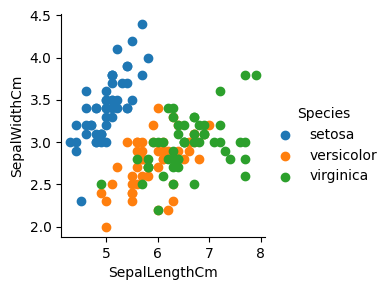

In [49]:
sns.FacetGrid(iris, hue='Species')\
   .map(plt.scatter, 'SepalLengthCm', 'SepalWidthCm')\
   .add_legend()

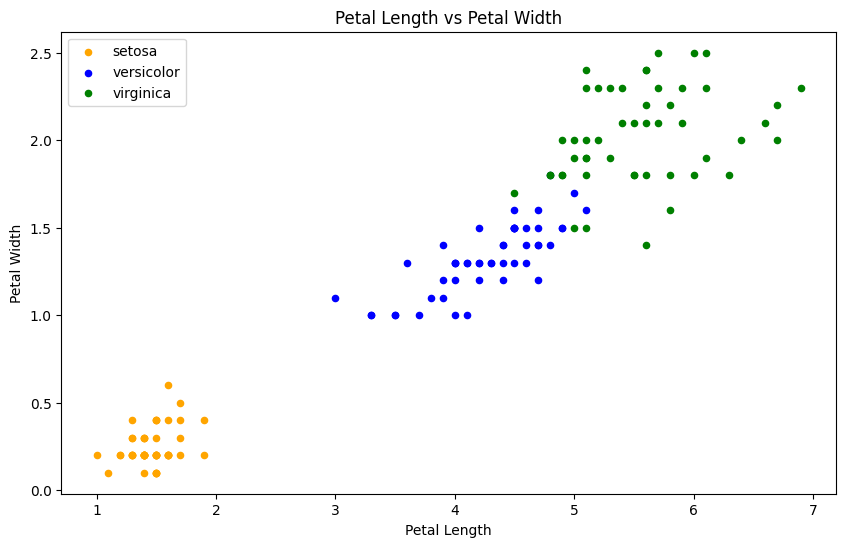

In [50]:
fig=iris[iris['Species']=='setosa'].plot(kind='scatter',x='PetalLengthCm',y='PetalWidthCm',color='orange',label='setosa')
iris[iris['Species']=='versicolor'].plot(kind='scatter',x='PetalLengthCm',y='PetalWidthCm',color='blue',label='versicolor',ax=fig)
iris[iris['Species']=='virginica'].plot(kind='scatter',x='PetalLengthCm',y='PetalWidthCm',color='green',label='virginica',ax=fig)

fig.set_xlabel('Petal Length')
fig.set_ylabel('Petal Width')
fig.set_title('Petal Length vs Petal Width')
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

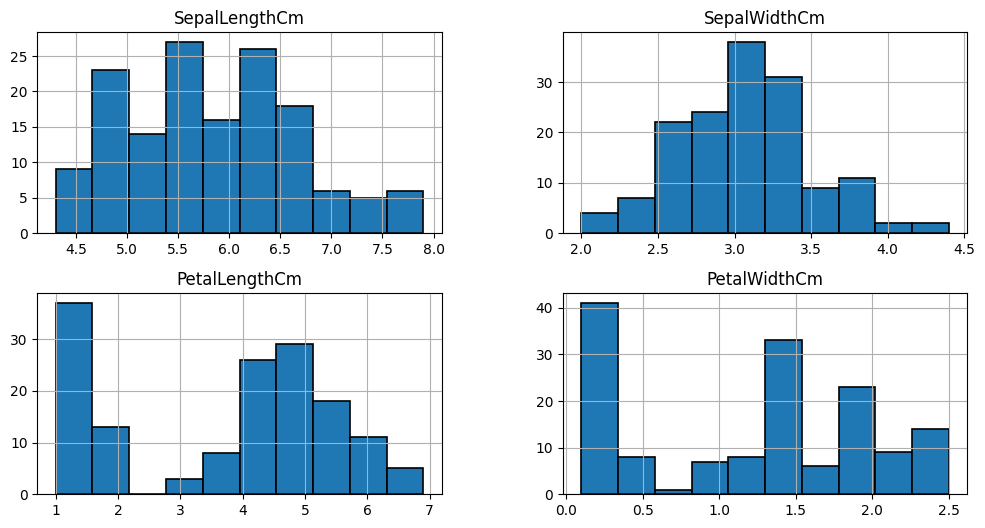

In [51]:
iris.hist(edgecolor='black',linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

<Axes: xlabel='Species', ylabel='PetalWidthCm'>

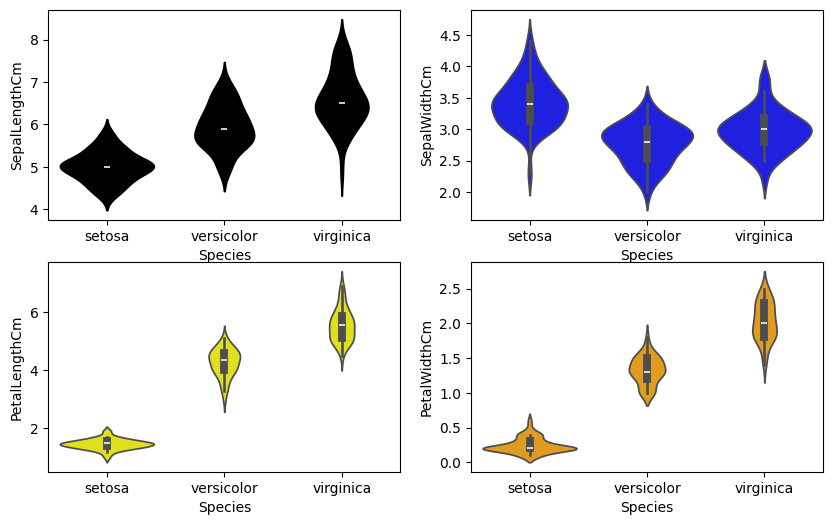

In [55]:
plt.figure(figsize=(10,6))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='SepalLengthCm',data=iris,color='black')
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='SepalWidthCm',data=iris,color='blue')
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='PetalLengthCm',data=iris,color='yellow')
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='PetalWidthCm',data=iris,color='orange')

# **lets do train and test model**

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # for using DTA
from sklearn import metrics


In [58]:
iris.shape

(150, 5)

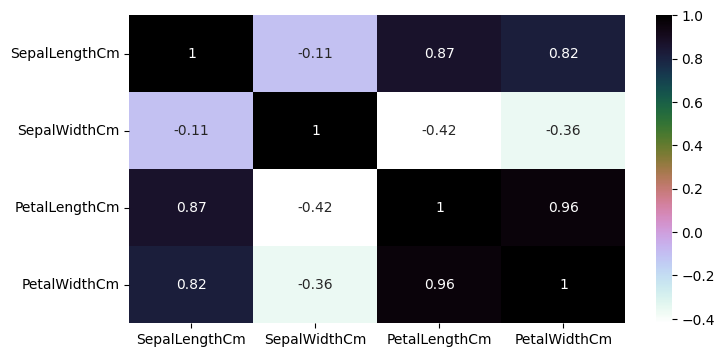

In [63]:

plt.figure(figsize=(8,4))
sns.heatmap(iris.drop('Species',axis=1).corr(), annot=True, cmap='cubehelix_r') # draws heatmap with input as correlation matrix calculated by iris.corr()
plt.show()

Observation---> The Sepal Width and Length are not correlated The Petal Width and Length are highly correlated We will use all the features for training the algorithm and check the accuracy.
Steps To Be followed When Applying an Algorithm

Split the dataset into training and testing dataset. The testing dataset is generally smaller than training one as it will help in training the model better.

Select any algorithm based on the problem (classification or regression) whatever you feel may be good. Then pass the training dataset to the algorithm to train it. We use the .fit() method Then pass the testing data to the trained algorithm to predict the outcome. We use the .predict() method. We then check the accuracy by passing the predicted outcome and the actual output to the model.



# **Spliting the Data into Training And Testing Data Set**

In [65]:
train,test=train_test_split(iris,test_size=0.2,random_state=2)
# our main data split into train and test
# the attribute test_size=0.3 splits the data into 70% and 30% ratio. train=70% and test=30%
print(train.shape)
print(test.shape)

(120, 5)
(30, 5)


In [66]:
train_X=train[['SepalLengthCm', 'SepalWidthCm','PetalLengthCm',	'PetalWidthCm'	]]
train_y=train.Species
test_X=test[['SepalLengthCm', 'SepalWidthCm','PetalLengthCm',	'PetalWidthCm']]
test_y=test.Species


In [67]:
train_X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
126,6.2,2.8,4.8,1.8
23,5.1,3.3,1.7,0.5
64,5.6,2.9,3.6,1.3
117,7.7,3.8,6.7,2.2
84,5.4,3.0,4.5,1.5


In [69]:
train_y.head()

,Species
126,virginica
23,setosa
64,versicolor
117,virginica
84,versicolor


In [70]:
test_X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
6,4.6,3.4,1.4,0.3
3,4.6,3.1,1.5,0.2
113,5.7,2.5,5.0,2.0
12,4.8,3.0,1.4,0.1
24,4.8,3.4,1.9,0.2


In [71]:
test_y.head()

,Species
6,setosa
3,setosa
113,virginica
12,setosa
24,setosa



# **Logistic Regression**

In [75]:
model=LogisticRegression()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of Logistic Regression is: ',metrics.accuracy_score(prediction,test_y))

The accuracy of Logistic Regression is:  0.9666666666666667


# **Decision Tree**

In [77]:
model=DecisionTreeClassifier()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy Score of Decision tree is : ', metrics.accuracy_score(prediction,test_y))

The accuracy Score of Decision tree is :  0.9333333333333333
